In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahdimashayekhi/health-and-lifestyle-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Computer\.cache\kagglehub\datasets\mahdimashayekhi\health-and-lifestyle-dataset\versions\2


In [3]:
import pandas as pd
import os
print("파일 목록:", os.listdir(path))

파일 목록: ['health_activity_data.csv']


In [4]:
csv_path = os.path.join(path, "health_activity_data.csv")
df = pd.read_csv(csv_path)

In [5]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


## 데이터 분석

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df[['Systolic', 'Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

In [29]:
df.drop(columns='Blood_Pressure', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Exercise_Hours_per_Week       1000 non-null   float64
 11  Smoker                        1000 non-null   object 
 12  Alcohol_Consumption_per_Week  1000 non-null   int64  
 13  Diab

In [30]:
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Height_cm                       0
Weight_kg                       0
BMI                             0
Daily_Steps                     0
Calories_Intake                 0
Hours_of_Sleep                  0
Heart_Rate                      0
Exercise_Hours_per_Week         0
Smoker                          0
Alcohol_Consumption_per_Week    0
Diabetic                        0
Heart_Disease                   0
Cluster                         0
PCA1                            0
PCA2                            0
Systolic                        0
Diastolic                       0
dtype: int64

In [31]:
df.drop(columns='ID', inplace=True)

In [32]:
dummies = []
for i in df.columns:
    if df[i].dtype == object:
        dummies.append(i)
print(dummies)

['Gender', 'Smoker', 'Diabetic', 'Heart_Disease']


In [33]:
df_dummies = pd.get_dummies(df[dummies], drop_first=True)
df = pd.concat([df.drop(columns=dummies), df_dummies], axis=1)
df.head()

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week,Cluster,PCA1,PCA2,Systolic,Diastolic,Gender_Male,Smoker_Yes,Diabetic_Yes,Heart_Disease_Yes
0,56,164,81,30.72,5134,1796,8.6,102,8.1,7,7,0.869594,1.806491,137,72,True,False,False,False
1,69,156,82,20.86,12803,1650,4.5,103,3.7,7,0,-0.349468,-0.011950,129,65,True,False,False,False
2,46,158,65,30.93,16408,1756,4.3,74,3.2,0,3,0.338643,-1.565443,127,68,False,True,False,False
3,32,197,87,31.19,18420,2359,4.1,116,8.5,5,7,-0.062022,0.812184,125,86,True,False,False,False
4,60,157,63,29.37,17351,2556,5.1,111,8.5,8,8,0.265080,1.130858,100,64,True,True,False,False


                                   Age  Height_cm  Weight_kg       BMI  \
Age                           1.000000   0.011398  -0.007586  0.047250   
Height_cm                     0.011398   1.000000  -0.050377 -0.008665   
Weight_kg                    -0.007586  -0.050377   1.000000  0.054850   
BMI                           0.047250  -0.008665   0.054850  1.000000   
Daily_Steps                  -0.041595  -0.047623  -0.006106 -0.017986   
Calories_Intake               0.015113  -0.024313  -0.049735  0.011911   
Hours_of_Sleep                0.002246   0.065942  -0.070725  0.009394   
Heart_Rate                    0.029257   0.006976  -0.005472  0.033932   
Exercise_Hours_per_Week       0.023398   0.024524  -0.019767  0.017643   
Alcohol_Consumption_per_Week -0.074179   0.043488  -0.017448 -0.030750   
Systolic                      0.047659   0.043653   0.004394 -0.014805   
Diastolic                    -0.017439   0.005123  -0.019256 -0.036265   
Gender_Male                   0.036248

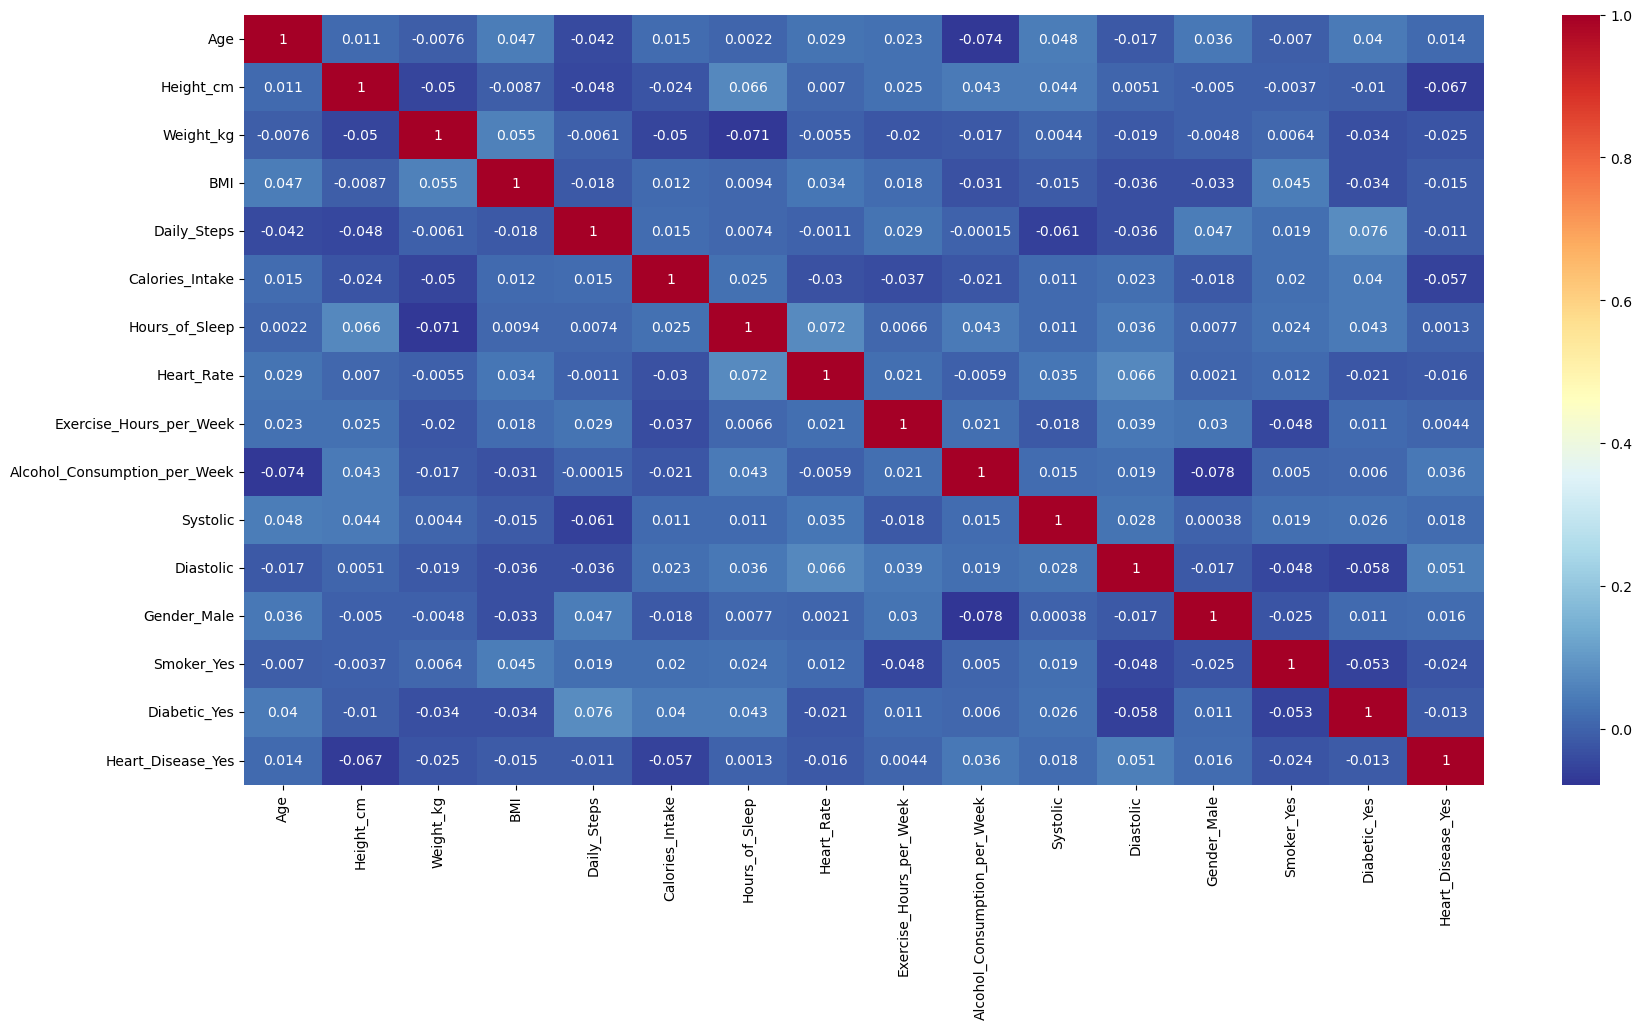

In [52]:
print(df.corr())
print("---------------------------------")
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
    annot=True,
    cmap='RdYlBu_r',
)
plt.show()

Heart_Disease_Yes               1.000000
Diastolic                       0.050543
Alcohol_Consumption_per_Week    0.035881
Systolic                        0.018300
Gender_Male                     0.016276
Age                             0.013559
Exercise_Hours_per_Week         0.004438
Hours_of_Sleep                  0.001315
Daily_Steps                    -0.011081
Diabetic_Yes                   -0.013462
BMI                            -0.015197
Heart_Rate                     -0.016434
Smoker_Yes                     -0.024202
Weight_kg                      -0.025191
Calories_Intake                -0.057214
Height_cm                      -0.067345
Name: Heart_Disease_Yes, dtype: float64
---------------------------------


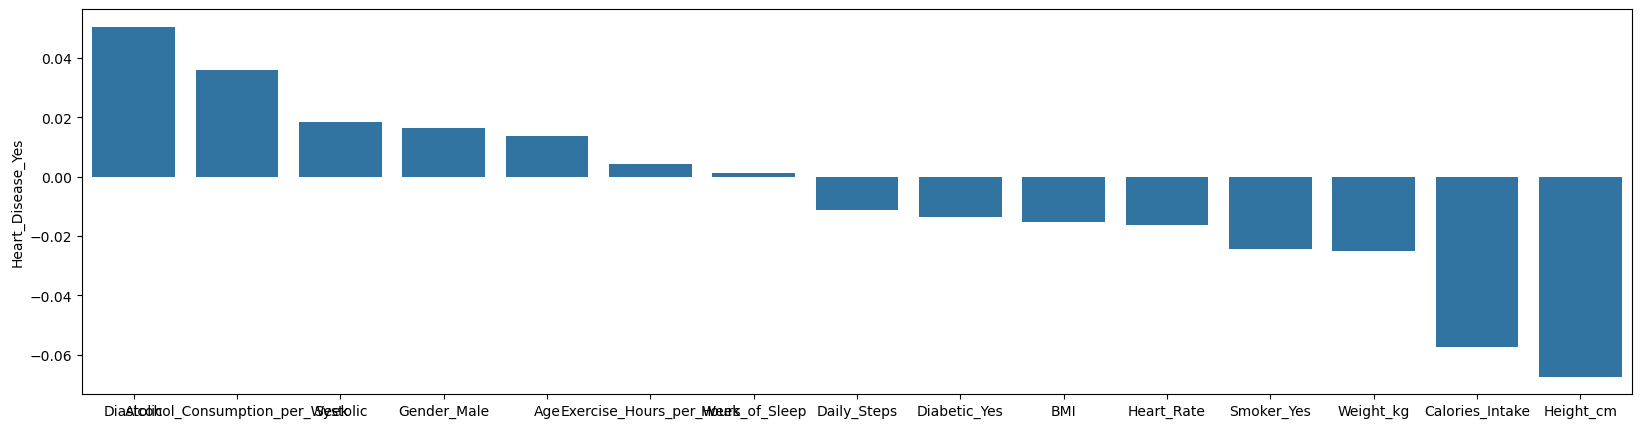

In [ ]:
df_corr = df.corr()['Heart_Disease_Yes'].sort_values(ascending=False)
print(df_corr)
print("---------------------------------")
plt.figure(figsize=(20,5))
sns.barplot(df_corr[1:])
plt.show()

### 딤배를 피면 diastolic 심장의 이완기에 혈관 내부 압력과 관련이 있을까?

In [34]:
df.columns

Index(['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
       'Exercise_Hours_per_Week', 'Alcohol_Consumption_per_Week', 'Cluster',
       'PCA1', 'PCA2', 'Systolic', 'Diastolic', 'Gender_Male', 'Smoker_Yes',
       'Diabetic_Yes', 'Heart_Disease_Yes'],
      dtype='object')

In [37]:
df.groupby('Smoker_Yes')["Diastolic"].describe()

,count,mean,std,min,25%,50%,75%,max
Smoker_Yes,,,,,,,,
False,809.0,75.056860,8.867938,60.0,67.0,75.0,83.0,89.0
True,191.0,73.984293,8.713255,60.0,67.5,75.0,81.0,89.0


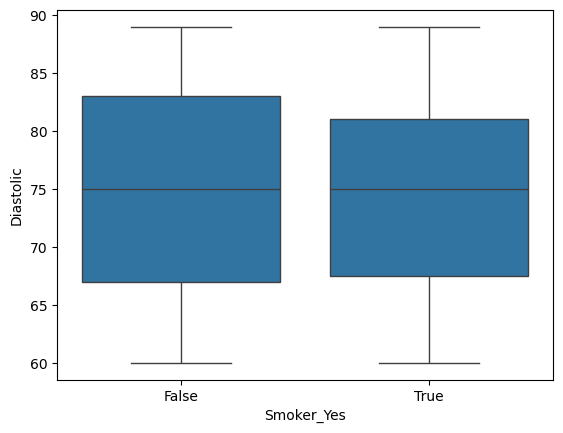

In [38]:
sns.boxplot(x='Smoker_Yes',y='Diastolic' , data=df)
plt.show()

In [ ]:
## 정규성 만족x
from scipy.stats import shapiro

stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)

print("Group1 Shapiro-Wilk test p-value:", p1)
print("Group2 Shapiro-Wilk test p-value:", p2)

Group1 Shapiro-Wilk test p-value: 9.407490294123537e-17
Group2 Shapiro-Wilk test p-value: 2.6406232869019492e-06


In [ ]:
## 등분산성 만족
from scipy.stats import levene

stat, p = levene(group1, group2)
print("Levene’s test p-value:", p)

Levene’s test p-value: 0.6589159033031173


In [47]:
from scipy.stats import ttest_ind, mannwhitneyu

group1 = df[df["Smoker_Yes"] == False]["Diastolic"].dropna()
group2 = df[df["Smoker_Yes"] == True]["Diastolic"].dropna()


t_stat, p_val = ttest_ind(group1, group2)
print("t-test p-value:", p_val)

u_stat, p_val_u = mannwhitneyu(group1, group2, alternative='two-sided')
print("Mann-Whitney U test p-value:", p_val_u)


t-test p-value: 0.13175925029674204
Mann-Whitney U test p-value: 0.12407054699840514


### 분석 2

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. 상관계수 계산
df_corr = df.corr(numeric_only=True)['Heart_Disease_Yes']

# 2. 상관계수가 절댓값 0.05 이상인 변수만 추출 (자기 자신은 제외)
selected_cols = df_corr[abs(df_corr) >= 0.03].index.tolist()
selected_cols.remove('Heart_Disease_Yes')  # 타겟 변수 제거

# 3. 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_cols])

# 4. KMeans 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

# 5. 결과 출력
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Cluster labels:\n", kmeans.labels_)


Cluster centers:
 [[ 0.10990376 -0.00571698  0.09654194  0.83237416]
 [-0.11623567  0.00604635 -0.10210403 -0.88032987]]
Cluster labels:
 [1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 

### 군집비교 4개

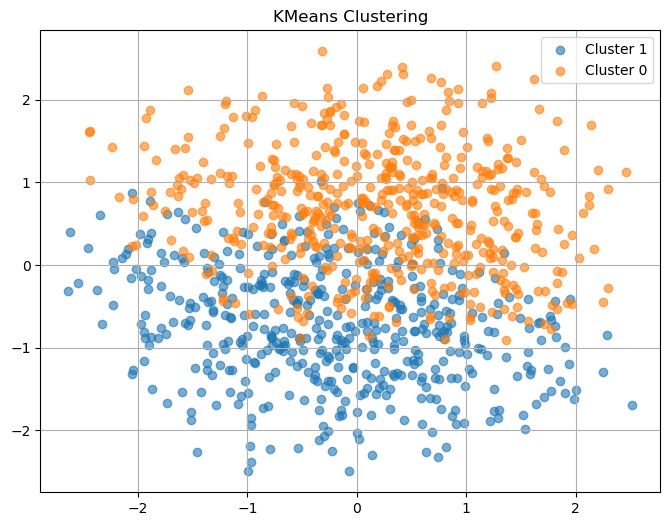

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_cols])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_plot = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in df_plot['Cluster'].unique():
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()


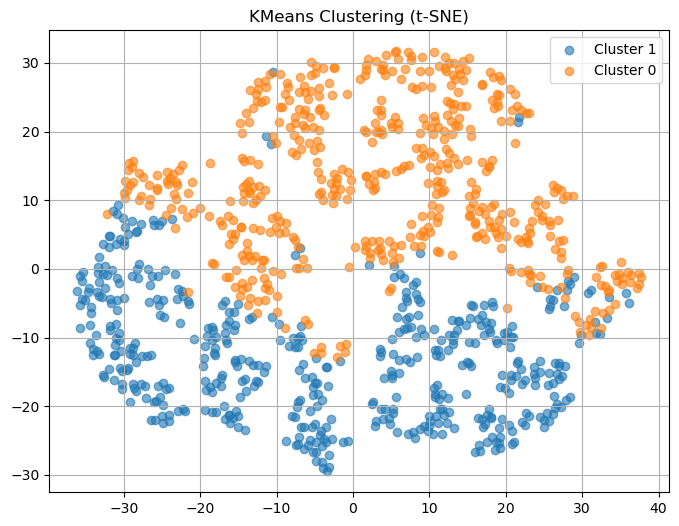

In [102]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

df_plot['TSNE_1'] = df_tsne[:,0]
df_plot['TSNE_2'] = df_tsne[:,1]

plt.figure(figsize=(8,6))
for cluster in df_plot['Cluster'].unique():
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(cluster_data['TSNE_1'], cluster_data['TSNE_2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('KMeans Clustering (t-SNE)')
plt.legend()
plt.grid(True)
plt.show()


### 4개의 변수 수치해석

In [ ]:
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster')[['Height_cm', 'Calories_Intake', 'Alcohol_Consumption_per_Week', 'Diastolic']].agg(['mean', 'median', 'std', 'min', 'max'])
cluster_summary


Height_cm                             Calories_Intake          \
               mean median        std  min  max            mean  median   
Cluster                                                                   
0        176.342412  178.0  14.473861  150  199     2323.357977  2332.0   
1        173.055556  173.0  14.437030  150  199     2331.092593  2311.5   

                                Alcohol_Consumption_per_Week                   \
                std   min   max                         mean median       std   
Cluster                                                                         
0        652.420535  1218  3498                     4.848249    5.0  2.803563   
1        664.189215  1201  3496                     4.281893    4.0  2.877707   

                 Diastolic                           
        min max       mean median       std min max  
Cluster                                              
0         0   9  82.210117   83.0  4.512341  72  89  
1         0   9  67.069959   67.0  4.639059  60  78

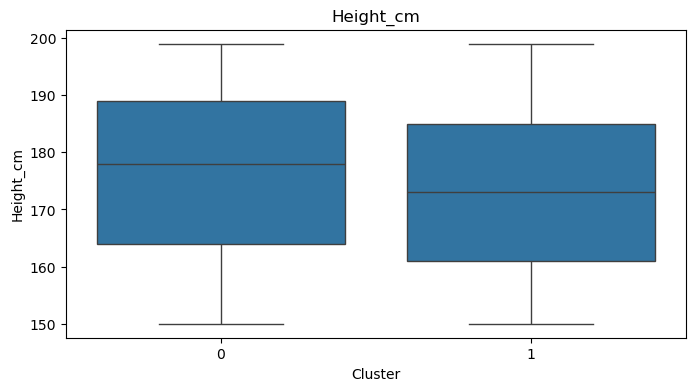

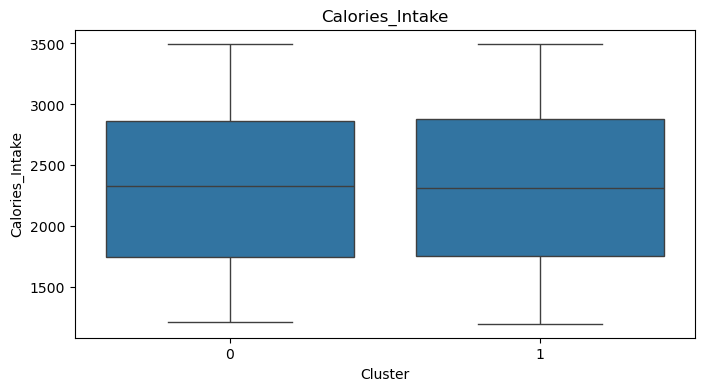

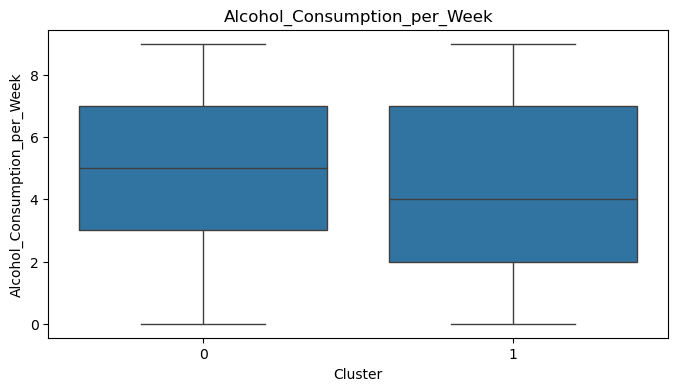

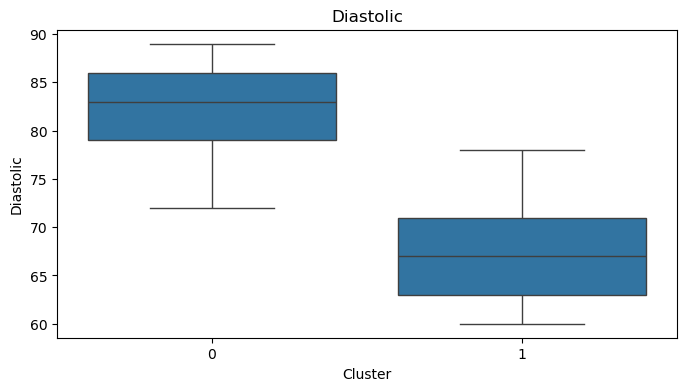

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in selected_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'{col}')
    plt.show()

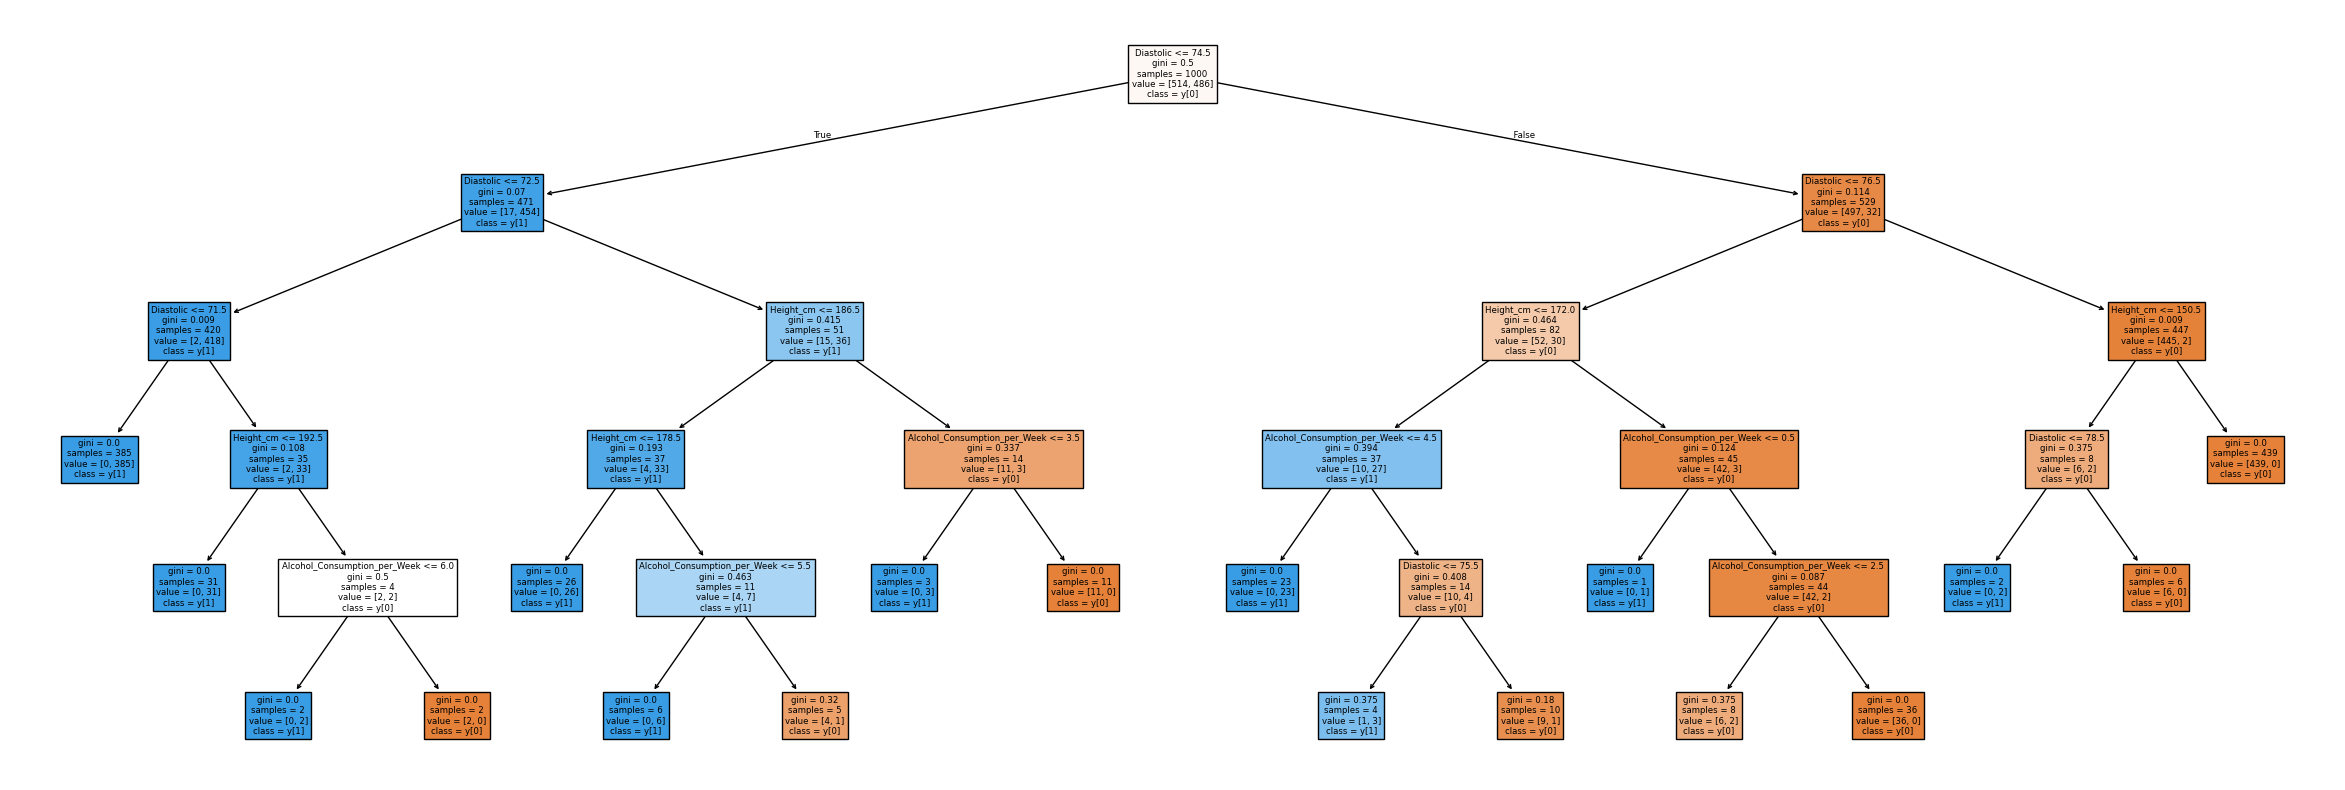

In [147]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_4 = DecisionTreeClassifier(max_depth=5)
clf_4.fit(df[['Height_cm', 'Calories_Intake', 'Alcohol_Consumption_per_Week', 'Diastolic']], df['Cluster'])

plt.figure(figsize=(30,10))
plot_tree(clf_4, feature_names=['Height_cm', 'Calories_Intake', 'Alcohol_Consumption_per_Week', 'Diastolic'], class_names=True, filled=True)
plt.show()


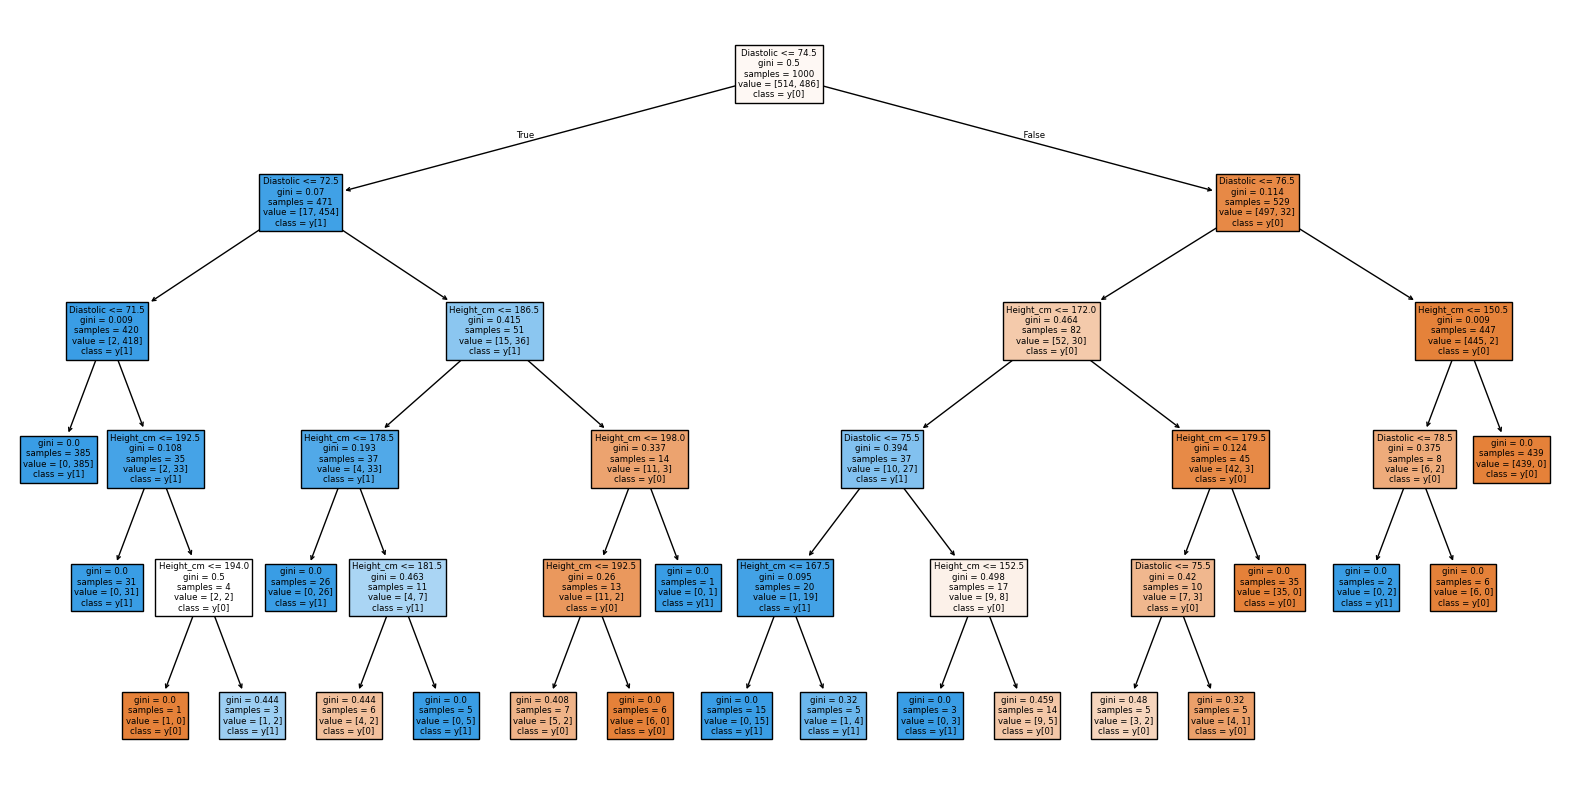

In [142]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_2 = DecisionTreeClassifier(max_depth=5)
clf_2.fit(df[['Height_cm','Diastolic']], df['Cluster'])

plt.figure(figsize=(20,10))
plot_tree(clf_2, feature_names=['Height_cm', 'Diastolic'], class_names=True, filled=True)
plt.show()


### 군집비교 2개 , 3개 (pca, tsne분석)

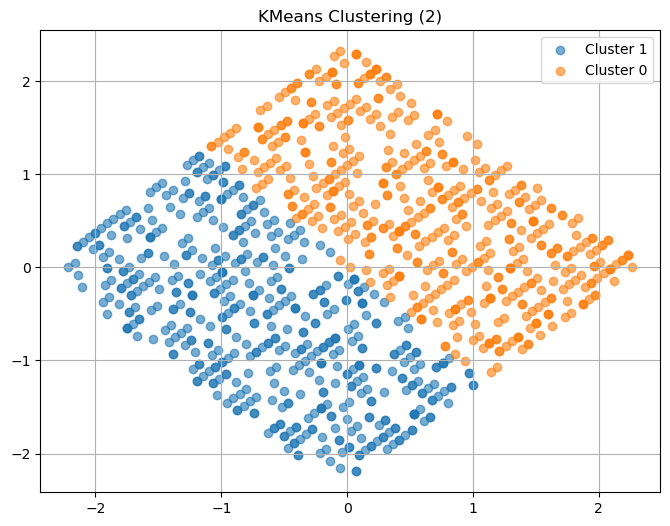

In [ ]:
df_reduced = df[['Height_cm', 'Diastolic']]  


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_reduced_scaled = scaler.fit_transform(df_reduced)

from sklearn.cluster import KMeans
kmeans_reduced = KMeans(n_clusters=2, random_state=42)
kmeans_reduced.fit(df_reduced_scaled)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced_scaled)

df_plot_reduced = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_plot_reduced['Cluster'] = kmeans_reduced.labels_


import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for c in df_plot_reduced['Cluster'].unique():
    plt.scatter(df_plot_reduced[df_plot_reduced['Cluster'] == c]['PC1'],
                df_plot_reduced[df_plot_reduced['Cluster'] == c]['PC2'],
                label=f'Cluster {c}', alpha=0.6)
plt.title('KMeans Clustering (2)')
plt.legend()
plt.grid(True)
plt.show()


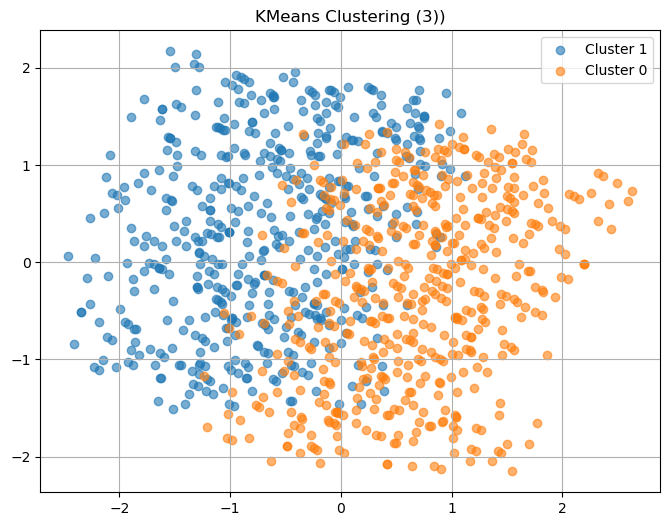

In [ ]:
df_reduced2 = df[['Height_cm', 'Diastolic' ,'Alcohol_Consumption_per_Week']]  


scaler = StandardScaler()
df_reduced_scaled2 = scaler.fit_transform(df_reduced2)


kmeans_reduced2 = KMeans(n_clusters=2, random_state=42)
kmeans_reduced2.fit(df_reduced_scaled2)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced_scaled2)

df_plot_reduced = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_plot_reduced['Cluster'] = kmeans_reduced2.labels_


plt.figure(figsize=(8,6))
for c in df_plot_reduced['Cluster'].unique():
    plt.scatter(df_plot_reduced[df_plot_reduced['Cluster'] == c]['PC1'],
                df_plot_reduced[df_plot_reduced['Cluster'] == c]['PC2'],
                label=f'Cluster {c}', alpha=0.6)
plt.title('KMeans Clustering (3))')
plt.legend()
plt.grid(True)
plt.show()


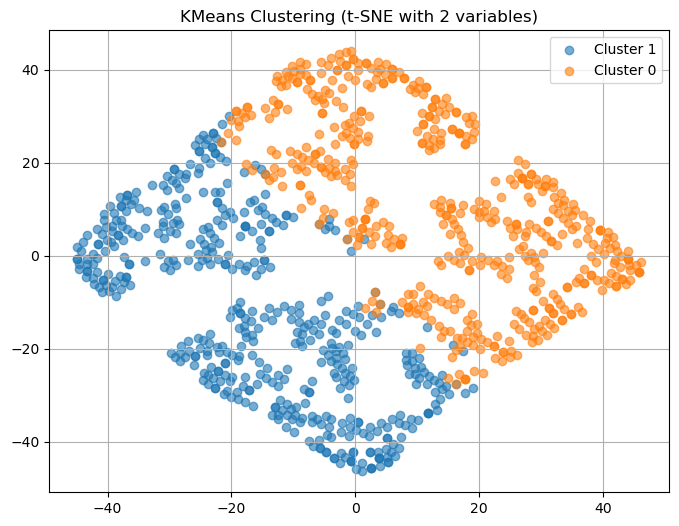

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


selected_cols_2 = ['Height_cm', 'Diastolic']
df_2 = df[selected_cols_2]

scaler = StandardScaler()
df_2_scaled = scaler.fit_transform(df_2)


tsne = TSNE(n_components=2, random_state=42)
df_tsne_2 = tsne.fit_transform(df_2_scaled)


df_plot['TSNE_1_2var'] = df_tsne_2[:, 0]
df_plot['TSNE_2_2var'] = df_tsne_2[:, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for cluster in df_plot['Cluster'].unique():
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(cluster_data['TSNE_1_2var'], cluster_data['TSNE_2_2var'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('KMeans Clustering (t-SNE with 2 variables)')
plt.legend()
plt.grid(True)
plt.show()


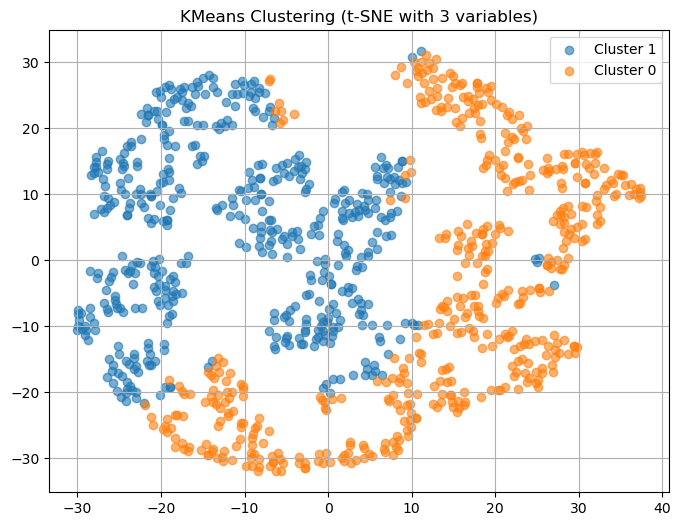

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

selected_cols_3 = ['Height_cm', 'Diastolic', 'Alcohol_Consumption_per_Week']
df_3 = df[selected_cols_3]


scaler = StandardScaler()
df_3_scaled = scaler.fit_transform(df_3)

tsne = TSNE(n_components=2, random_state=42)
df_tsne_3 = tsne.fit_transform(df_3_scaled)

from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=2, random_state=42)
labels_3 = kmeans_3.fit_predict(df_3_scaled)

df_plot['TSNE_1_3var'] = df_tsne_3[:, 0]
df_plot['TSNE_2_3var'] = df_tsne_3[:, 1]
df_plot['Cluster_3var'] = labels_3

plt.figure(figsize=(8,6))
for cluster in df_plot['Cluster_3var'].unique():
    cluster_data = df_plot[df_plot['Cluster_3var'] == cluster]
    plt.scatter(cluster_data['TSNE_1_3var'], cluster_data['TSNE_2_3var'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('KMeans Clustering (t-SNE with 3 variables)')
plt.legend()
plt.grid(True)
plt.show()


In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 변수별 선택
selected_cols_4 = ['Height_cm', 'Calories_Intake', 'Alcohol_Consumption_per_Week', 'Diastolic']
selected_cols_3 = ['Height_cm', 'Alcohol_Consumption_per_Week', 'Diastolic']
selected_cols_2 = ['Height_cm', 'Diastolic']

# 데이터 선택
df_4 = df[selected_cols_4]
df_3 = df[selected_cols_3]
df_2 = df[selected_cols_2]

# 스케일링
scaler = StandardScaler()
df_4_scaled = scaler.fit_transform(df_4)
df_3_scaled = scaler.fit_transform(df_3)
df_2_scaled = scaler.fit_transform(df_2)

# KMeans 클러스터링 (k=2)
kmeans_4 = KMeans(n_clusters=2, random_state=42)
kmeans_3 = KMeans(n_clusters=2, random_state=42)
kmeans_2 = KMeans(n_clusters=2, random_state=42)

labels_4 = kmeans_4.fit_predict(df_4_scaled)
labels_3 = kmeans_3.fit_predict(df_3_scaled)
labels_2 = kmeans_2.fit_predict(df_2_scaled)

# 실루엣 점수 계산
score_4 = silhouette_score(df_4_scaled, labels_4)
score_3 = silhouette_score(df_3_scaled, labels_3)
score_2 = silhouette_score(df_2_scaled, labels_2)

print("Silhouette Score (4 variables):", score_4)
print("Silhouette Score (3 variables):", score_3)
print("Silhouette Score (2 variables):", score_2)


Silhouette Score (4 variables): 0.1844484146622622
Silhouette Score (3 variables): 0.2501361756776139
Silhouette Score (2 variables): 0.3573416656785298


## 모델 만들기

### DecisionTreeClassfier

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Accuracy: 0.9733333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       158
           1       0.98      0.96      0.97       142

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Confusion Matrix:
 [[155   3]
 [  5 137]]


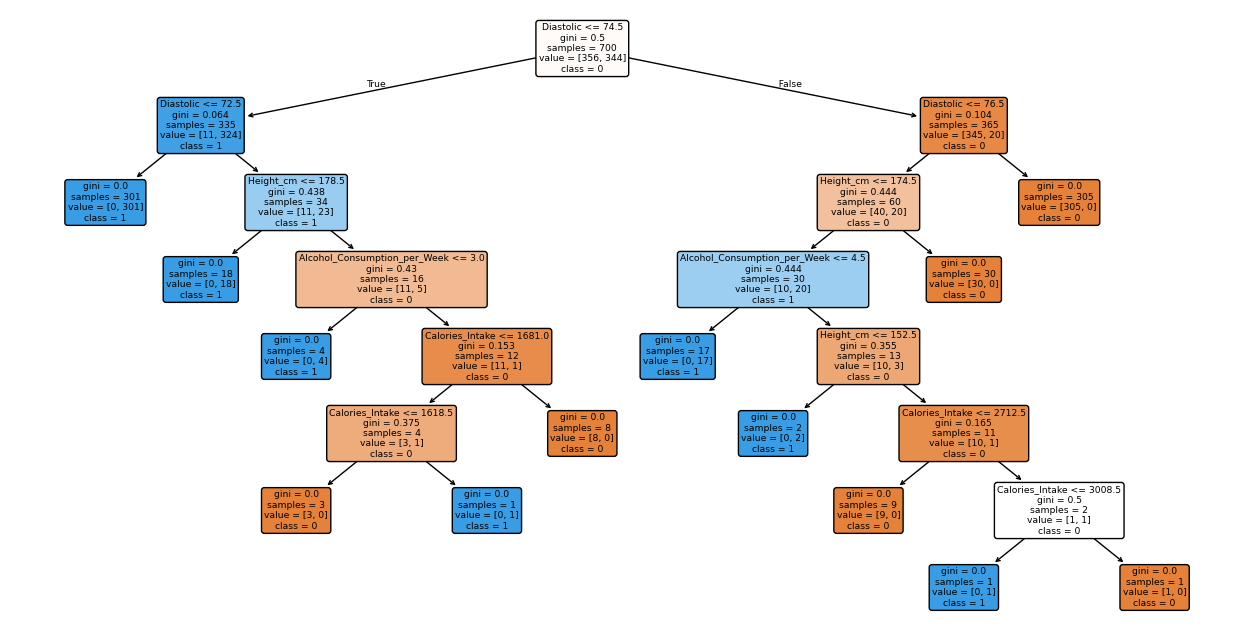

In [ ]:
X = df[['Height_cm', 'Calories_Intake', 'Alcohol_Consumption_per_Week', 'Diastolic']]
y = kmeans_full.labels_ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], filled=True, rounded=True)
plt.show()


Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       158
           1       0.99      0.97      0.98       142

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Confusion Matrix:
 [[156   2]
 [  4 138]]


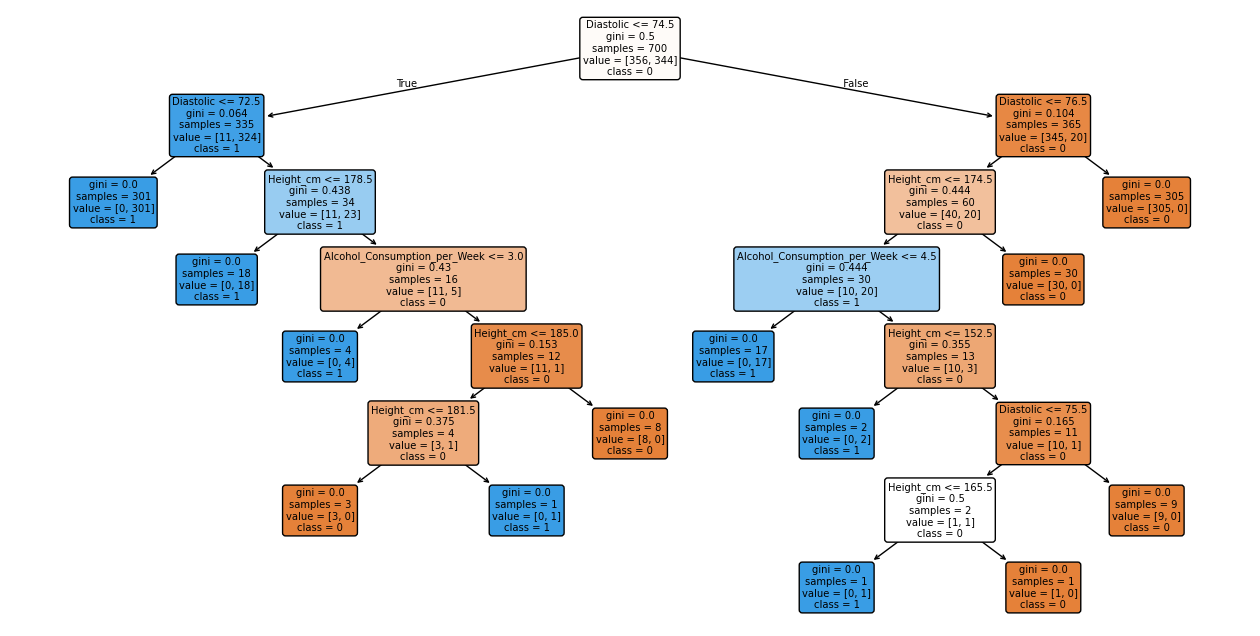

In [ ]:
X = df[['Height_cm',  'Alcohol_Consumption_per_Week', 'Diastolic']]
y = kmeans_full.labels_ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], filled=True, rounded=True)
plt.show()


### 

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       158
           1       0.98      0.94      0.96       142

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Confusion Matrix:
 [[155   3]
 [  9 133]]


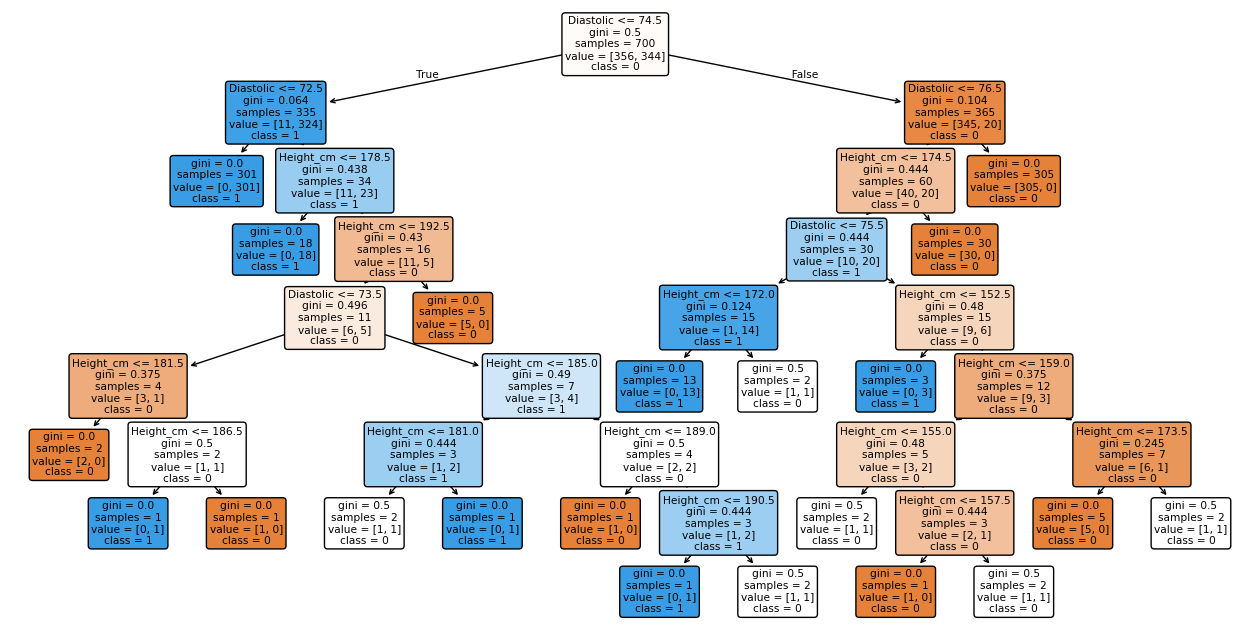

In [ ]:
X = df[['Height_cm',  'Diastolic']]
y = kmeans_full.labels_ 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], filled=True, rounded=True)
plt.show()

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Height_cm',  'Calories_Intake', 'Alcohol_Consumption_per_Week', 'Diastolic']]
y = kmeans_full.labels_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9733333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.97      0.97      0.97       142

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Confusion Matrix:
 [[154   4]
 [  4 138]]


In [ ]:
X = df[['Height_cm', 'Alcohol_Consumption_per_Week', 'Diastolic']]
y = kmeans_full.labels_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       158
           1       0.98      0.98      0.98       142

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Confusion Matrix:
 [[155   3]
 [  3 139]]


In [ ]:
X = df[['Height_cm', 'Diastolic']]
y = kmeans_full.labels_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9566666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       158
           1       0.97      0.94      0.95       142

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Confusion Matrix:
 [[154   4]
 [  9 133]]


### 딥러닝 모델

In [189]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 6.0/376.0 MB 33.5 MB/s eta 0:00:12
   - -------------------------------------- 13.4/376.0 MB 33.6 MB/s eta 0:00:11
   -- ------------------------------------- 21.2/376.0 MB 35.4 MB/s eta 0:00:11
   --- ------------------------------------ 28.8/376.0 MB 36.6 MB/s eta 0:00:10
   --- ------------------------------------ 36.4/376.0 MB 36.2 MB/s eta 0:00:10
   ---- ----------------------------------- 44.3/376.0 MB 36.6 MB/s eta 0:00:10
   ----- ---------------------------------- 52.4/376.0 MB 37.5 MB/s eta 0:00:09
   ------ --------------------------------- 60.8/376.0 MB 38.0 MB/s eta 0:00:09
   ------- -------------------------------- 68.7/376.0 MB 38.1 MB/s eta 0:00:09
   -------- ------------------------------- 76.8/376.0 MB 38.0 MB/s eta 0:00:08
   --------- ------------------------------ 85.2/376.0 MB 38.3 MB/s eta 0:00:08
   --------- ------------------------------ 93.6/

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['Height_cm','Diastolic']]
y = kmeans_full.labels_

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 모델 구성
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax') 
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# 예측 및 평가
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = y_pred_nn_prob.argmax(axis=1)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Accuracy: 0.9533333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       158
           1       0.97      0.93      0.95       142

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Confusion Matrix:
 [[154   4]
 [ 10 132]]


In [208]:

# 입력, 출력 설정
X = df.drop(columns=['Cluster','Calories_Intake','Alcohol_Consumption_per_Week' ,'Heart_Disease_Yes'])
y = kmeans_full.labels_

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # 군집 개수만큼 노드
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# 예측
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# 평가
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Neural Network Accuracy: 0.9433333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       158
           1       0.96      0.92      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300


Confusion Matrix:
 [[152   6]
 [ 11 131]]


In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 입력, 출력 설정
X = df.drop(columns=['Cluster','Alcohol_Consumption_per_Week' ,'Heart_Disease_Yes'])
y = kmeans_full.labels_

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # 군집 개수만큼 노드
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# 예측
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# 평가
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Neural Network Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       158
           1       0.96      0.94      0.95       142

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Confusion Matrix:
 [[152   6]
 [  9 133]]
